In [1]:
# Подключение пакетов
import os, sys, time
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from torch.utils.data import DataLoader

print('Numpy version:', np.version.version)

# Устанавливаем рабочую директорию в корень проекта
while not os.getcwd().endswith("hw4_nv"):
    os.chdir(os.pardir)

Numpy version: 1.23.5


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from src.config import v1

mel_config = v1.MelConfig()
data_config = v1.DataConfig()
model_config = v1.ModelConfig()
train_config = v1.TrainConfig()

In [4]:
from IPython import display


def show_mel(data: torch.Tensor, title: str = "data example", eps=1e-5):
    """
    Преобразование входных данных в картинку и ее отображение.

    Args:
        data (torch.Tensor): вход модели в виде torch.tensor [1 x H x W] или [H x W]
        title (str): подпись к графику
    """
    if data.min() < -1 - eps or data.max() > 1 + eps:
        data = (data - data.min()) / (data.max() - data.min())
    else:
        data = (data / 2 + 0.5).clip(0, 1)
    if len(data.shape) == 3:
        data = data.squeeze(0)
    
    plt.figure(figsize=(20, 3))
    plt.imshow(data.cpu().numpy(), interpolation="lanczos", cmap="viridis")
    plt.grid()
    plt.axis("off")
    plt.title(title)
    
    plt.show()

def visualize_audio(wav: torch.Tensor, sr: int = 22050):
    # Average all channels
    if wav.dim() == 2:
        # Any to mono audio convertion
        wav = wav.mean(dim=0)
    
    plt.figure(figsize=(20, 5))
    plt.plot(wav, alpha=.7, c='green')
    plt.grid()
    plt.xlabel('Time', size=20)
    plt.ylabel('Amplitude', size=20)
    plt.show()
    
    display.display(display.Audio(wav, rate=sr, normalize=False))

def show_data_sample(sample):
    mel, audio, mel_loss = sample
    print(mel.shape)
    show_mel(torch.cat([mel, mel_loss], dim=0))
    visualize_audio(audio)

torch.Size([80, 33])


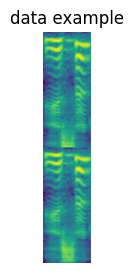

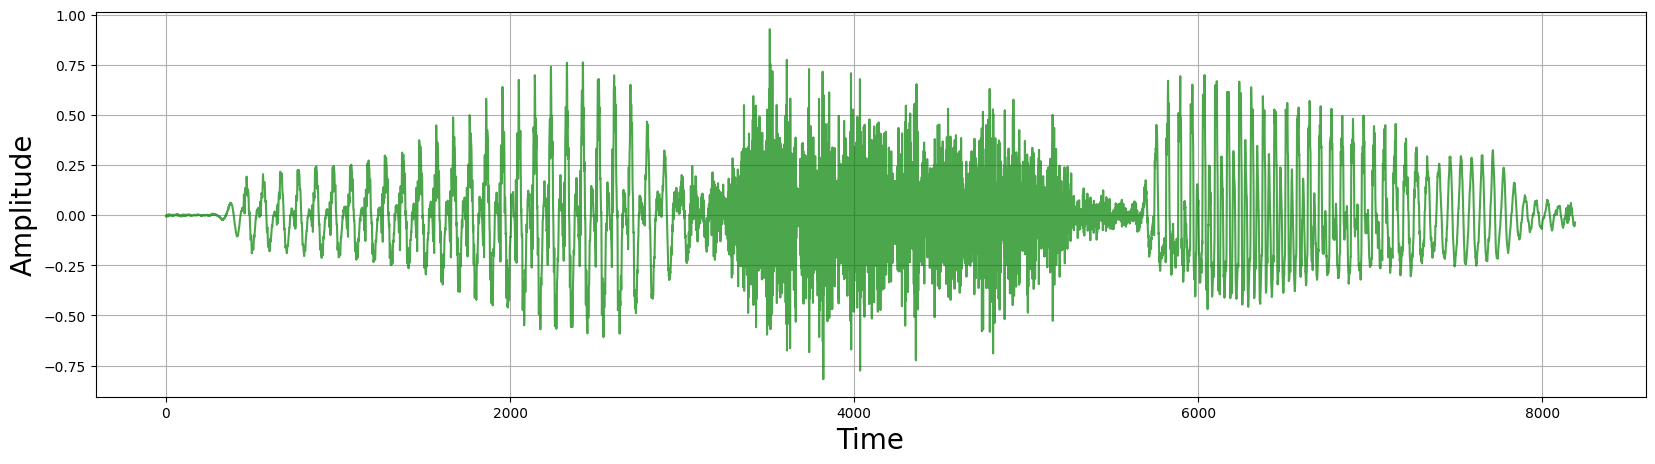

In [5]:
mel_spec = mel_config.mel_spectrogram()
mel_spec_loss = mel_config.mel_spectrogram(loss=True)
dataset = data_config.valid_dataset(mel_spec, mel_spec_loss)
show_data_sample(dataset[0])

In [10]:
model = model_config.generator
model

init'ed Conv1d
init'ed ConvTranspose1d
init'ed ConvTranspose1d
init'ed ConvTranspose1d
init'ed ConvTranspose1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init'ed Conv1d
init

Generator(
  (in_conv): Conv1d(80, 512, kernel_size=(7,), stride=(1,), padding=(3,))
  (upsample_blocks): ModuleList(
    (0): ConvTranspose1d(512, 256, kernel_size=(16,), stride=(8,), padding=(4,))
    (1): ConvTranspose1d(256, 128, kernel_size=(16,), stride=(8,), padding=(4,))
    (2): ConvTranspose1d(128, 64, kernel_size=(4,), stride=(2,), padding=(1,))
    (3): ConvTranspose1d(64, 32, kernel_size=(4,), stride=(2,), padding=(1,))
  )
  (res_blocks): ModuleList(
    (0): ModuleList(
      (0): ResBlockType1(
        (convs1): ModuleList(
          (0): Conv1d(256, 256, kernel_size=(3,), stride=(1,), padding=(1,))
          (1): Conv1d(256, 256, kernel_size=(3,), stride=(1,), padding=(3,), dilation=(3,))
          (2): Conv1d(256, 256, kernel_size=(3,), stride=(1,), padding=(5,), dilation=(5,))
        )
        (convs2): ModuleList(
          (0): Conv1d(256, 256, kernel_size=(3,), stride=(1,), padding=(1,))
          (1): Conv1d(256, 256, kernel_size=(3,), stride=(1,), padding=(1,))

In [11]:
model = model_config.discriminator
model

Discriminator(
  (mpd): MultiPeriodDiscriminator(
    (discriminators): ModuleList(
      (0): PeriodDiscriminator(
        (convs): ModuleList(
          (0): Conv2d(1, 32, kernel_size=(5, 1), stride=(3, 1), padding=(2, 0))
          (1): Conv2d(32, 128, kernel_size=(5, 1), stride=(3, 1), padding=(2, 0))
          (2): Conv2d(128, 512, kernel_size=(5, 1), stride=(3, 1), padding=(2, 0))
          (3): Conv2d(512, 1024, kernel_size=(5, 1), stride=(3, 1), padding=(2, 0))
          (4): Conv2d(1024, 1024, kernel_size=(5, 1), stride=(1, 1), padding=(2, 0))
        )
        (out_conv): Conv2d(1024, 1, kernel_size=(3, 1), stride=(1, 1), padding=(1, 0))
      )
      (1): PeriodDiscriminator(
        (convs): ModuleList(
          (0): Conv2d(1, 32, kernel_size=(5, 1), stride=(3, 1), padding=(2, 0))
          (1): Conv2d(32, 128, kernel_size=(5, 1), stride=(3, 1), padding=(2, 0))
          (2): Conv2d(128, 512, kernel_size=(5, 1), stride=(3, 1), padding=(2, 0))
          (3): Conv2d(512, 102

In [19]:
a = torch.zeros((16, 1, 10, 20))
torch.flatten(a, 1, -1).shape

torch.Size([16, 200])